In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/HRDataset.csv')
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0


Wszyscy managerowie wystawiają oceny Fully Meets, ale niektórzy managerowie nie wystawiają ocen innego typu. 


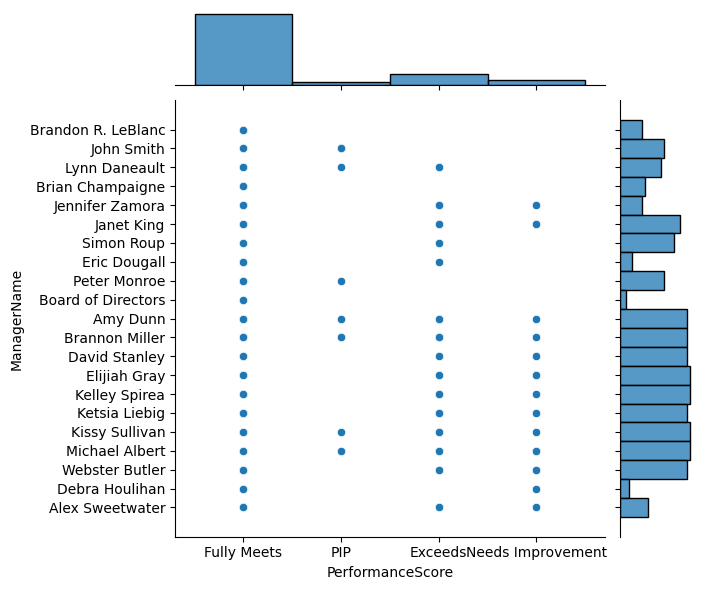

In [2]:
#Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy?
sns.jointplot(x='PerformanceScore',y='ManagerName',data=df)
print('Wszyscy managerowie wystawiają oceny Fully Meets, ale niektórzy managerowie nie wystawiają ocen innego typu. ')

Najlepszymi źródłami wydają się Billboard, wyszukiwarki internetowe i Diversity Job Fair


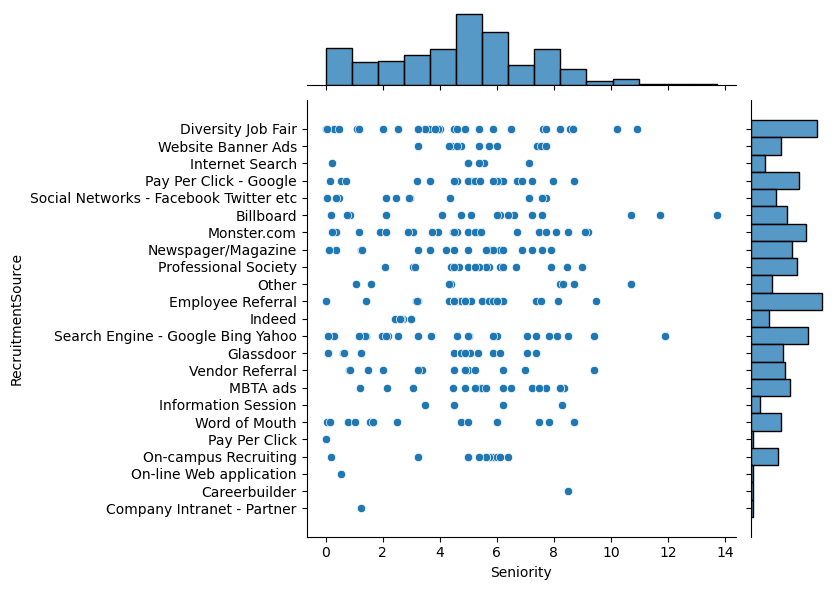

In [3]:
#Jakie źródła pozyskania pracownika są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df)
print('Najlepszymi źródłami wydają się Billboard, wyszukiwarki internetowe i Diversity Job Fair')

Zbyt mało przypadków z niskim EmpSatisfaction i z Marital Status innym niż 0 i 1, żeby miało to znaczenie.


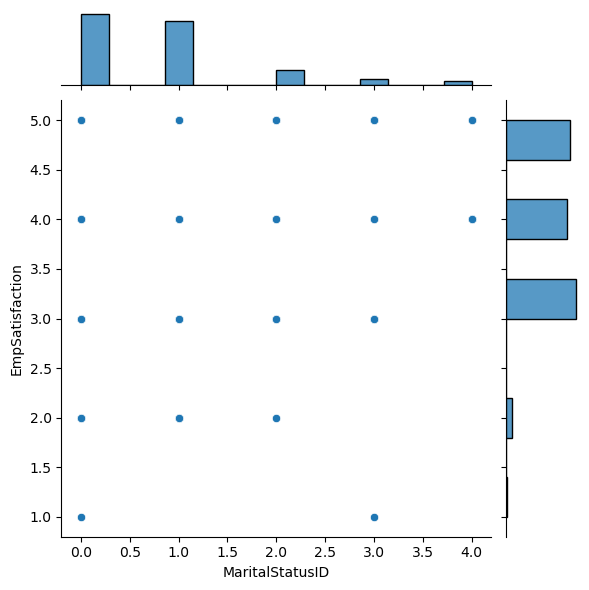

In [8]:
#Czy stan cywilny pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy)?
df['MaritalStatusID']=df['MaritalStatusID'].astype(int)
sns.jointplot(x='MaritalStatusID',y='EmpSatisfaction',data=df)
print("Zbyt mało przypadków z niskim EmpSatisfaction i z Marital Status innym niż 0 i 1, żeby miało to znaczenie.")

<Axes: xlabel='work_status', ylabel='year'>

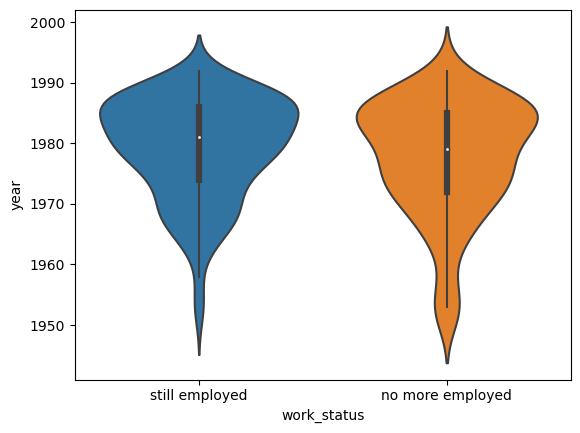

In [5]:
#Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
df['year']=df['DOB'].dt.year
def unix_epoch(x):
    if x>2000:
        x=x-100
    return x
df['year'] = df['year'].apply(lambda x: unix_epoch(x))
def status(x):
    if x=='Active':
        y='still employed'
    else:
        y='no more employed'
    return y
df['work_status'] = df['EmploymentStatus'].apply(lambda x: status(x))
#if df['work_status']==1:
sns.violinplot(x='work_status',y='year',data=df)

Liczba specjalnych projektów nie zależy od wieku pracownika


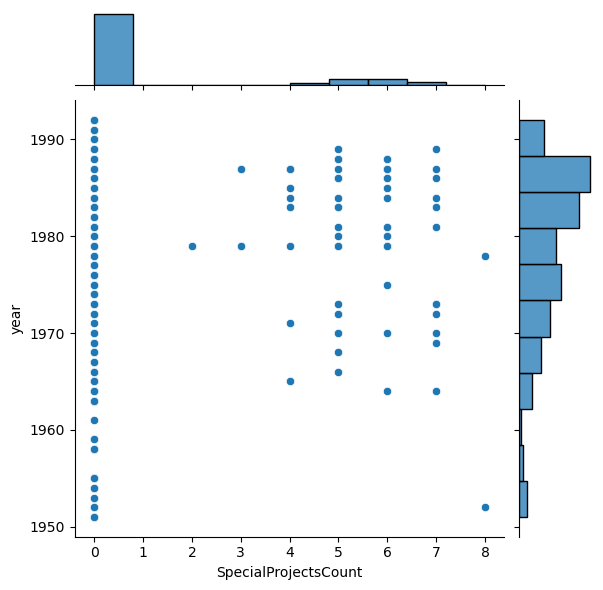

In [6]:
#Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
sns.jointplot(x='SpecialProjectsCount',y='year',data=df)
print("Liczba specjalnych projektów nie zależy od wieku pracownika")